In [ ]:
import pandas as pd
from prophet import Prophet 
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))

In [2]:
data = pd.read_feather('database/base.feather')
data

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Region,...,OMonth,OPeriod,Order Date Month,SYear,SMonth,SPeriod,Ship Date Month,Delivery,Price,Benefit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,...,11,35,2016-11-01,2016,11,35,2016-11-01,3,130.98,1
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,...,11,35,2016-11-01,2016,11,35,2016-11-01,3,243.98,1
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,West,...,6,30,2016-06-01,2016,6,30,2016-06-01,4,7.31,1
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,...,10,22,2015-10-01,2015,10,22,2015-10-01,7,191.52,0
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,...,10,22,2015-10-01,2015,10,22,2015-10-01,7,11.18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,Miami,Florida,South,...,1,1,2014-01-01,2014,1,1,2014-01-01,2,8.42,1
9990,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,West,...,2,38,2017-02-01,2017,3,39,2017-03-01,5,45.98,1
9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,West,...,2,38,2017-02-01,2017,3,39,2017-03-01,5,129.29,1
9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,West,...,2,38,2017-02-01,2017,3,39,2017-03-01,5,7.40,1


In [7]:
## Função para o retorno do DataFrame de regrassão
def regressao(data, variable, orderVariable, regVariable):
    resposta = pd.DataFrame()
    for var in data[variable].unique():
        print(var)
        regressao = data[data[variable] == var][[orderVariable, regVariable]].groupby(orderVariable)[regVariable].sum().reset_index()
        regressao = regressao.rename(columns={orderVariable: 'ds', regVariable: 'y'})
        m = Prophet().fit(regressao)
        future = m.make_future_dataframe(periods=12, freq='MS')
        forecast = m.predict(future)
        # print(forecast)
        forecast[variable] = var 
        fig1 = m.plot(forecast)
        plt.show()
        resposta = resposta.append(
            forecast[[variable, 'ds', 'yhat', 'yhat_lower', 'yhat_upper']],
            ignore_index = True
        )
    return resposta

05:10:31 - cmdstanpy - INFO - Chain [1] start processing


South


05:10:32 - cmdstanpy - INFO - Chain [1] done processing


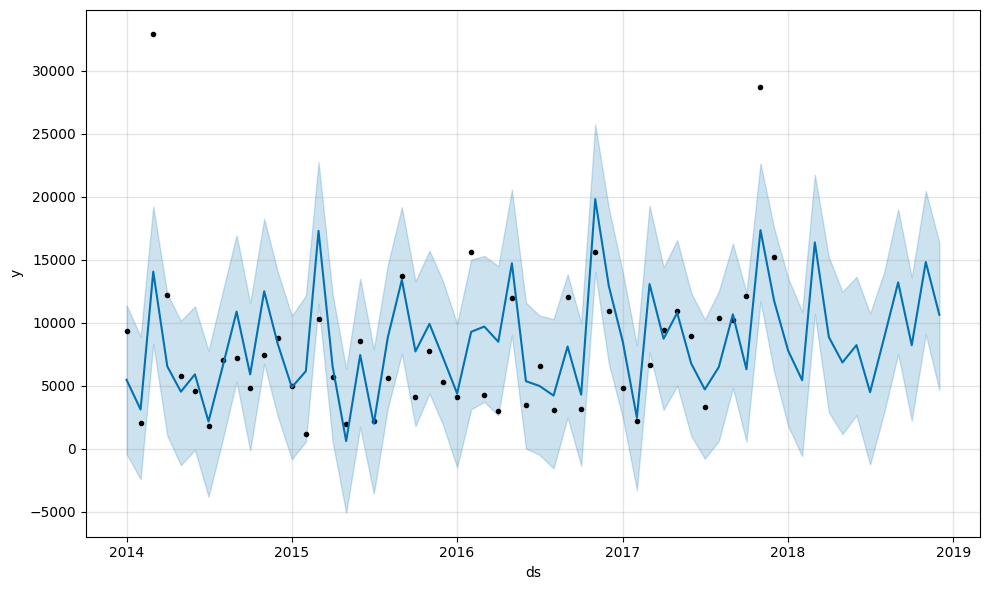

/tmp/ipykernel_2366/2667680367.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resposta = resposta.append(
05:10:32 - cmdstanpy - INFO - Chain [1] start processing


West


05:10:33 - cmdstanpy - INFO - Chain [1] done processing


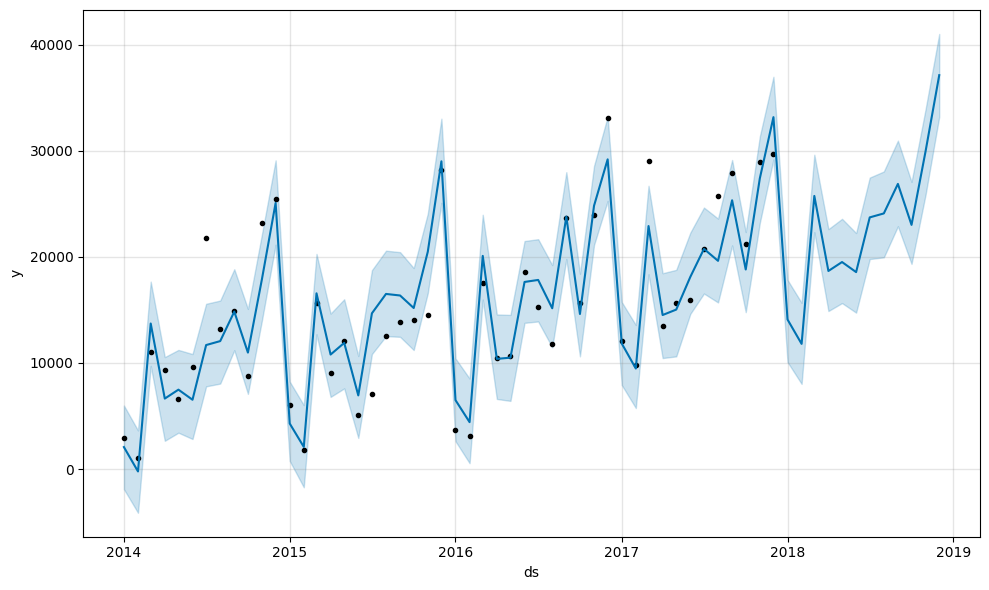

/tmp/ipykernel_2366/2667680367.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resposta = resposta.append(
05:10:33 - cmdstanpy - INFO - Chain [1] start processing
05:10:34 - cmdstanpy - INFO - Chain [1] done processing


Central


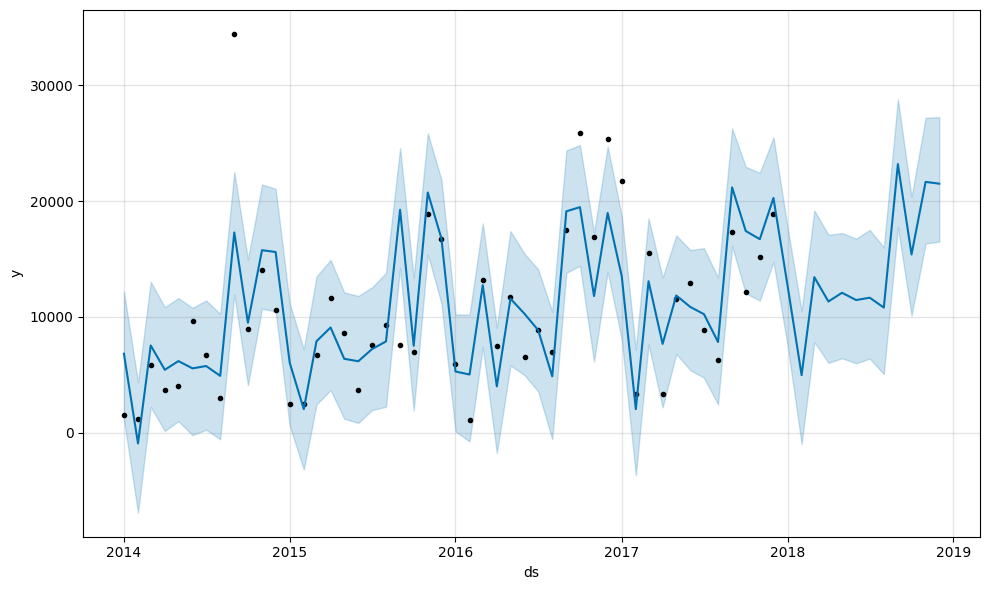

/tmp/ipykernel_2366/2667680367.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resposta = resposta.append(
05:10:34 - cmdstanpy - INFO - Chain [1] start processing
05:10:35 - cmdstanpy - INFO - Chain [1] done processing


East


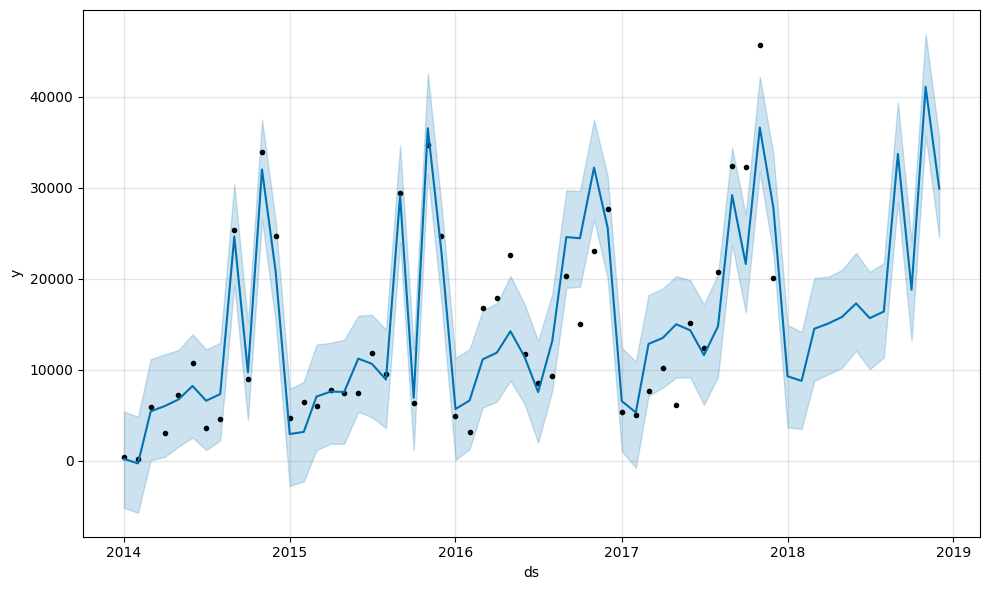

/tmp/ipykernel_2366/2667680367.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resposta = resposta.append(


,Region,ds,yhat,yhat_lower,yhat_upper
0,South,2014-01-01,5474.042250,-419.485554,11391.945742
1,South,2014-02-01,3116.463497,-2403.752909,8897.761405
2,South,2014-03-01,14054.126336,8329.418532,19221.166752
3,South,2014-04-01,6539.138730,1046.643068,12267.449228
4,South,2014-05-01,4530.499405,-1295.202709,10156.552094
...,...,...,...,...,...
235,East,2018-08-01,16382.690898,11328.105072,21724.430143
236,East,2018-09-01,33704.330478,28486.878049,39340.168116
237,East,2018-10-01,18783.949342,13116.789097,24142.280085
238,East,2018-11-01,41069.559525,35713.757739,46887.272026


In [9]:
regressao_region = regressao(data, 'Region', 'Order Date Month', 'Sales')
regressao_region.to_feather('database/regressao_regiao.feather')
regressao_region

05:13:29 - cmdstanpy - INFO - Chain [1] start processing


Consumer


05:13:29 - cmdstanpy - INFO - Chain [1] done processing


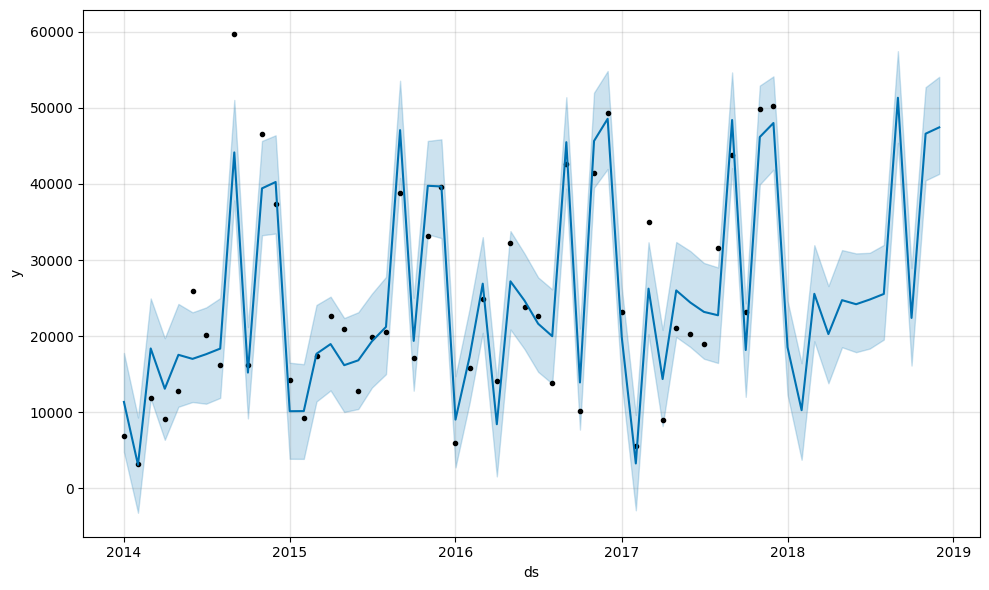

/tmp/ipykernel_2366/2667680367.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resposta = resposta.append(
05:13:30 - cmdstanpy - INFO - Chain [1] start processing


Corporate


05:13:30 - cmdstanpy - INFO - Chain [1] done processing


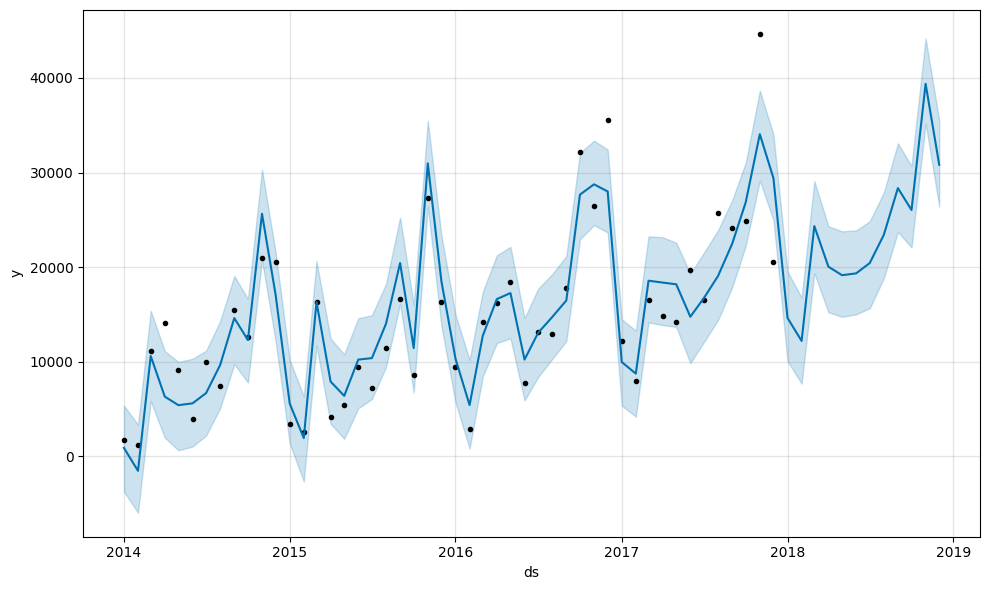

/tmp/ipykernel_2366/2667680367.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resposta = resposta.append(
05:13:31 - cmdstanpy - INFO - Chain [1] start processing


Home Office


05:13:31 - cmdstanpy - INFO - Chain [1] done processing


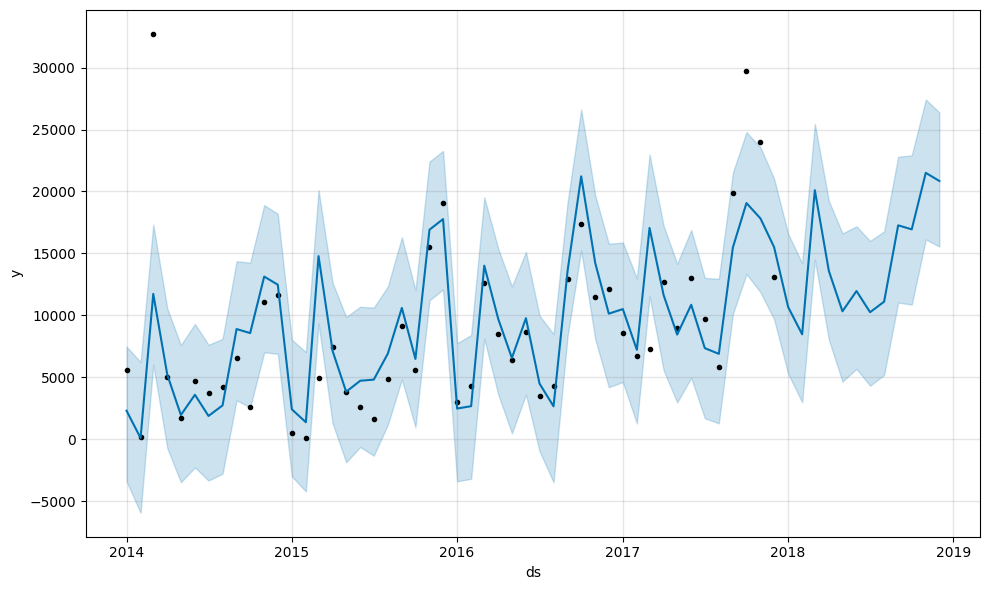

/tmp/ipykernel_2366/2667680367.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resposta = resposta.append(


,Segment,ds,yhat,yhat_lower,yhat_upper
0,Consumer,2014-01-01,11366.305511,4795.722561,17800.436807
1,Consumer,2014-02-01,3106.669670,-3191.483123,9324.047161
2,Consumer,2014-03-01,18386.867794,11814.790662,24957.908738
3,Consumer,2014-04-01,13098.643033,6386.629174,19736.030888
4,Consumer,2014-05-01,17552.784065,10729.957018,24232.434136
...,...,...,...,...,...
175,Home Office,2018-08-01,11105.262705,5193.670268,16777.744552
176,Home Office,2018-09-01,17268.807294,11036.176462,22800.478460
177,Home Office,2018-10-01,16943.473723,10868.436015,22916.199015
178,Home Office,2018-11-01,21504.845847,16130.571621,27419.660543


In [10]:
regressao_segment = regressao(data, 'Segment', 'Order Date Month', 'Sales')
regressao_segment.to_feather('database/regressao_segment.feather')
regressao_segment